Mounted at /content/drive


In [1]:
!ls

CycleGAN.ipynb	Kadai0502.ipynb  facades_dataset.mat


In [2]:
import torch
from torchvision import datasets,transforms

In [3]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.MNIST(
    './data',
    train = True,
    download=True,#自動ダウンロード
    transform = transform#テンソルへの変換
)
test_dataset = datasets.MNIST(
    "./data",
    train=False,
    download=True,
    transform=transform
)
# データの読み込み設定．Batch_sizeはここで確定
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    #1epochでのバッチサイズ
    batch_size=100 ,
    shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=100,
    shuffle=True)
for i,(inputs,labels) in enumerate(train_loader,0):
  if i ==0:
    print(f"inputs shape minibatch = {inputs.shape}, labels shape = {labels.shape}")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

inputs shape minibatch = torch.Size([100, 1, 28, 28]), labels shape = torch.Size([100])


In [4]:
import torch
import torch.nn as nn

class MyNet(nn.Module):
  # InputからOutputまでのモデルの定義
  def __init__(self,input_shape):
    super(MyNet,self).__init__()# ルール
    # モデルの定義
    self.layers = nn.Sequential(
        nn.Linear(input_shape,1024),
        nn.ReLU(),
        nn.Linear(1024,1024),
        nn.ReLU(),
        nn.Linear(1024,10),#出力層
        nn.Softmax()
        )
  def forward(self,x):
    # モデルを使ってメンバー変数内にxを入れて返す
    return self.layers(x)

In [5]:
# Net Workインスタンスの作成．画像のShapeだけ付与
net = MyNet(28*28) 
criterion = nn.CrossEntropyLoss() # cross entropyを基準に用いる
optimizer = torch.optim.Adam(net.parameters(), lr=.001)#learning ratio (StepSize):変化量

epochs = 5 # 繰り返し回数

for epoch in range(epochs):
  # 代入するための変数を定義
  running_loss = 0.0
  accuracy_train = 0.0
  total_num = 0 
  for i,(inputs,labels) in enumerate(train_loader,0):
    optimizer.zero_grad() # Optimizerの保持する勾配をゼロにする．
    # 型変換
    inputs = torch.reshape(inputs,shape=(inputs.shape[0], 28*28 ))
    # 実際にクラスに代入
    outputs = net(inputs)
    # ミニバッチ内の損失を求める
    loss = criterion(outputs,labels)
    loss.backward()#勾配の逆伝搬→計算した微分係数の記録
    optimizer.step()#勾配情報をもとにパラメータ更新(学習)

    running_loss += loss.item() # ルイ背の損失関数の値を保持（Optimizerは毎回リセットされるため）
    # この一連の処理は不明
    with torch.no_grad():
      _,predicted_labels = torch.max(outputs.data,dim=1)#最大確率となるラベルの検出（正解ラベルを抽出）→確率から導出
      accuracy_train += torch.sum(predicted_labels == labels).item()# 精度の計算
      total_num += labels.shape[0]
    # 途中経過の出力
    if i % 100 == 99:
      print(f"[{epoch + 1},{i+1:5d} ] loss : {running_loss/total_num:.5f} , \
      accuracy(train) = {accuracy_train/total_num*100:.3f}%")
# テスト用データでの精度計算
  total_num = 0
  accuracy_test = .0
  for i,(inputs,labels) in enumerate(test_loader,0):
    # 精度計算
    with torch.no_grad():
      inputs = torch.reshape(inputs,shape=(inputs.shape[0],28*28))#最大確率となるラベルの検出（正解ラベルを抽出）→確率から導出
      outputs = net(inputs)
      _,predicted_labels = torch.max(outputs.data,dim=1)
      accuracy_test += torch.sum(predicted_labels == labels).item()
      total_num += labels.shape[0]

  print(f"accuracy(test) = {accuracy_test/total_num:.3f}%")
      



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[1,  100 ] loss : 0.01848 ,       accuracy(train) = 62.800%
[1,  200 ] loss : 0.01803 ,       accuracy(train) = 66.650%
[1,  300 ] loss : 0.01747 ,       accuracy(train) = 71.977%
[1,  400 ] loss : 0.01714 ,       accuracy(train) = 75.133%
[1,  500 ] loss : 0.01694 ,       accuracy(train) = 77.066%
[1,  600 ] loss : 0.01668 ,       accuracy(train) = 79.625%
accuracy(test) = 0.941%
[2,  100 ] loss : 0.01518 ,       accuracy(train) = 94.410%
[2,  200 ] loss : 0.01515 ,       accuracy(train) = 94.710%
[2,  300 ] loss : 0.01514 ,       accuracy(train) = 94.713%
[2,  400 ] loss : 0.01514 ,       accuracy(train) = 94.778%
[2,  500 ] loss : 0.01513 ,       accuracy(train) = 94.878%
[2,  600 ] loss : 0.01511 ,       accuracy(train) = 94.993%
accuracy(test) = 0.955%
[3,  100 ] loss : 0.01504 ,       accuracy(train) = 95.800%
[3,  200 ] loss : 0.01502 ,       accuracy(train) = 95.885%
[3,  300 ] loss : 0.01500 ,       accuracy(train) = 96.123%
[3,  400 ] loss : 0.01499 ,       accuracy(train) = 

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
/tmp/ipykernel_1919/1874527765.py:14: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  indice_miss_classfication = torch.range(0,pred_labels.shape[0]-1,dtype=torch.int32)[pred_labels != true_labels]


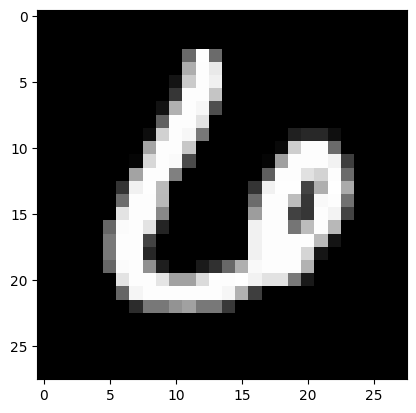

true label = 6,predicted label = 0


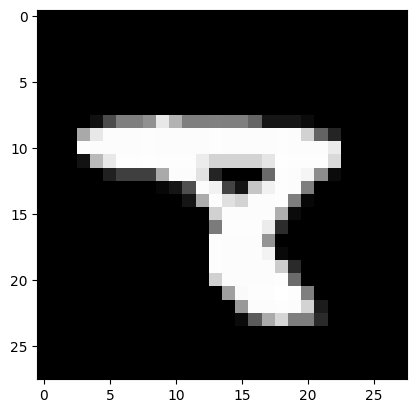

true label = 8,predicted label = 7


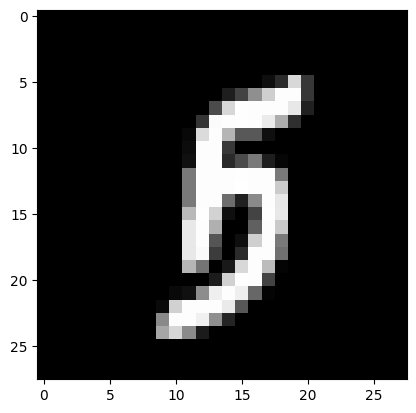

true label = 5,predicted label = 8


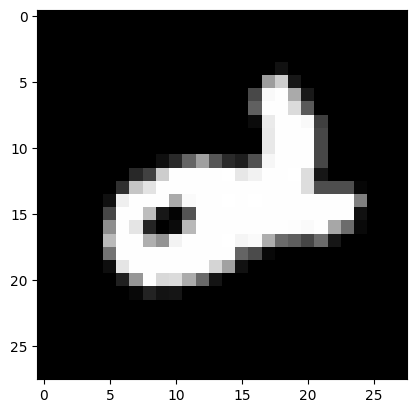

true label = 2,predicted label = 4


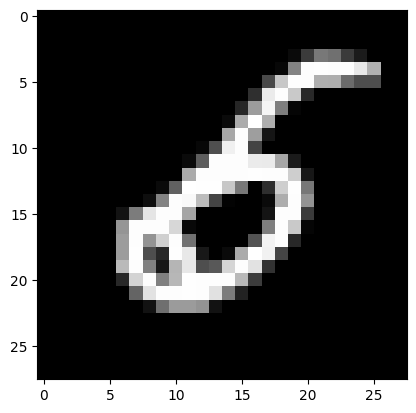

true label = 5,predicted label = 6


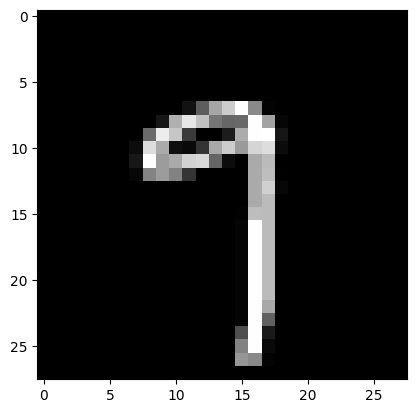

true label = 9,predicted label = 7


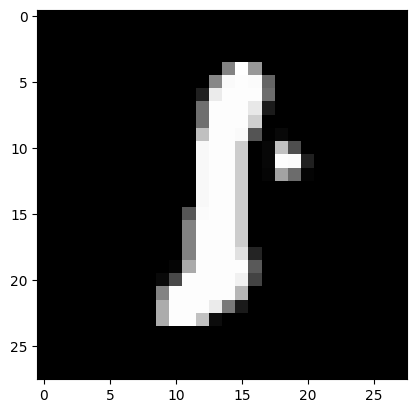

true label = 1,predicted label = 8


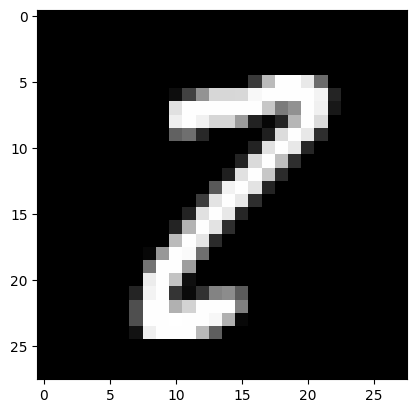

true label = 2,predicted label = 8


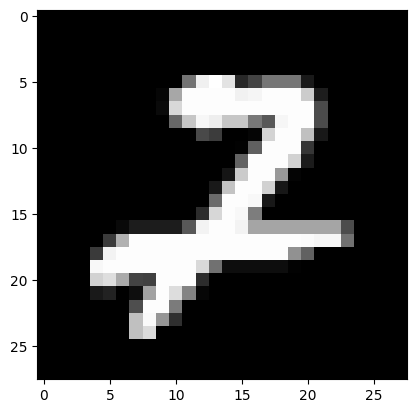

true label = 7,predicted label = 2


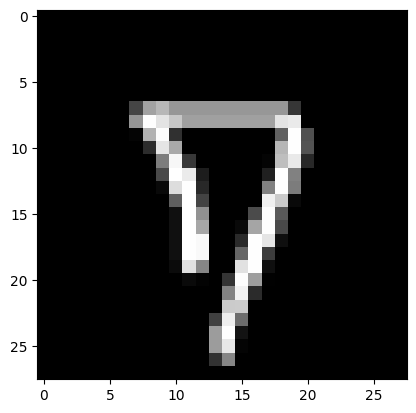

true label = 7,predicted label = 9


In [6]:
import matplotlib.pyplot as plt
pred_labels = torch.Tensor([])
true_labels = torch.Tensor([])
test_images = torch.Tensor([])
for i,(inputs,labels) in enumerate(test_loader,0):
  with torch.no_grad():
    test_images = torch.cat((test_images,inputs),dim=0)#ListでいうAppend処理？
    inputs = torch.reshape(inputs,shape=(inputs.shape[0],28*28))#型変換
    outputs = net(inputs)#出力の取得
    _,predicted_labels = torch.max(outputs.data,dim=1)#確率の取得
    pred_labels = torch.cat((pred_labels,predicted_labels),dim=0)#正解ラベル／予測ラベルの取得
    true_labels = torch.cat((true_labels,labels),dim=0)#ListでいうAppend処理？記録
# 失敗したやつだけ表示
indice_miss_classfication = torch.range(0,pred_labels.shape[0]-1,dtype=torch.int32)[pred_labels != true_labels]


for i in indice_miss_classfication[:10]:
  plt.imshow(test_images[i,0,:,:].numpy(),cmap="gray")
  plt.show()
  print(f"true label = {int(true_labels[i])},predicted label = {int(pred_labels[i])}")

/tmp/ipykernel_1919/1435845044.py:1: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  indice_true_classfication = torch.range(0,pred_labels.shape[0]-1,dtype=torch.int32)[pred_labels == true_labels]


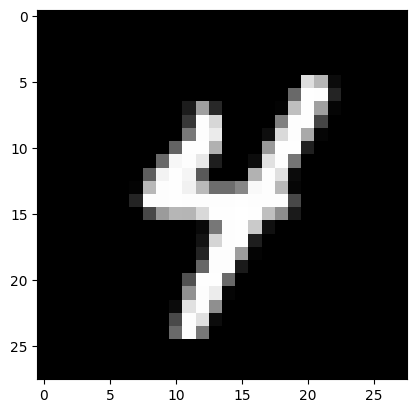

true label = 4,predicted label = 4


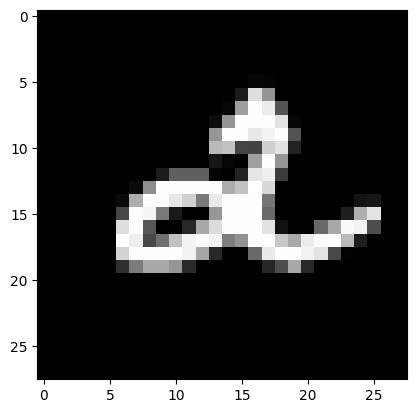

true label = 2,predicted label = 2


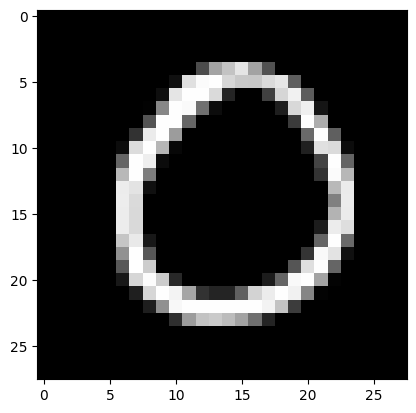

true label = 0,predicted label = 0


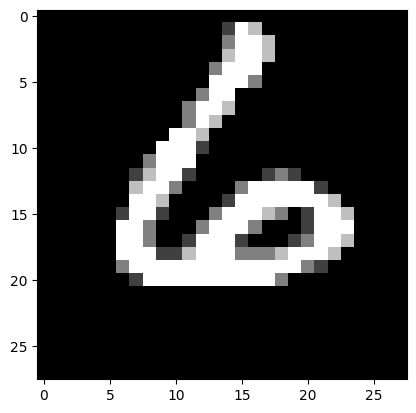

true label = 6,predicted label = 6


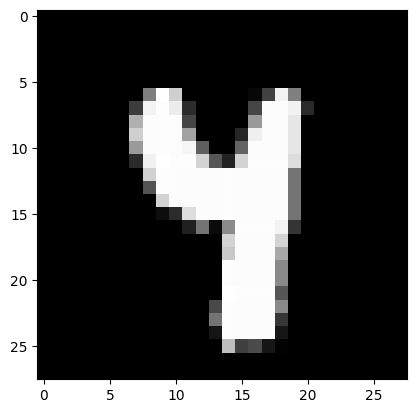

true label = 4,predicted label = 4


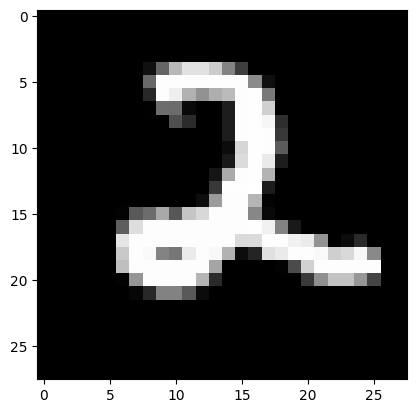

true label = 2,predicted label = 2


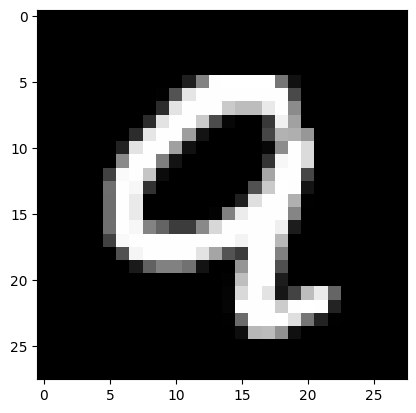

true label = 9,predicted label = 9


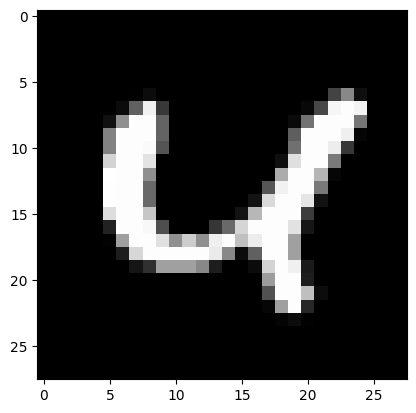

true label = 4,predicted label = 4


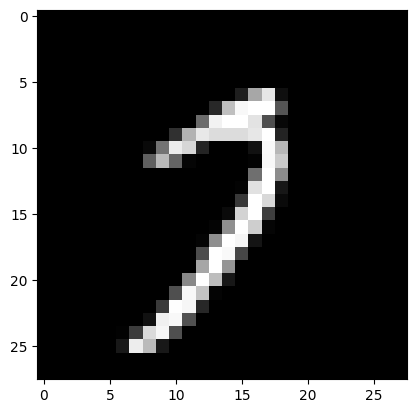

true label = 7,predicted label = 7


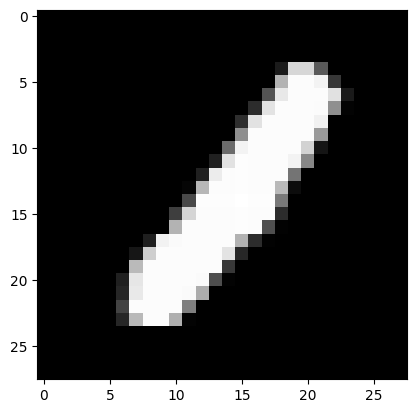

true label = 1,predicted label = 1


In [7]:
indice_true_classfication = torch.range(0,pred_labels.shape[0]-1,dtype=torch.int32)[pred_labels == true_labels]


for i in indice_true_classfication[:10]:
  plt.imshow(test_images[i,0,:,:].numpy(),cmap="gray")
  plt.show()
  print(f"true label = {int(true_labels[i])},predicted label = {int(pred_labels[i])}")